In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Classical ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

import warnings
warnings.filterwarnings("ignore")

#TASK 1: EXPLORATORY DATA ANALYSIS AND DATA UNDERSTANDING

In [30]:
# 1. LOAD DATASET AND PROVIDE DETAILED DESCRIPTION

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Final csv/smart_manufacturing_dataset.csv')

print("\n1.1 DATASET DESCRIPTION")
print("Dataset Name: Smart Manufacturing Dataset")
print("Created by: Manufacturing Industry Analytics Team (2025)")
print("Accessed from: Provided CSV file for academic research")
print("Date of Creation: May 2025")

print("\n Alignment with UN Sustainable Development Goals (UNSDG):")
print("  → SDG 9: Industry, Innovation, and Infrastructure")
print("     • Promotes sustainable industrialization and innovation")
print("     • Monitors manufacturing efficiency and quality control")
print("\n  → SDG 12: Responsible Consumption and Production")
print("     • Tracks material usage and recycling rates")
print("     • Measures energy efficiency in production processes")
print("     • Reduces waste through defect rate monitoring")

print("\n1.2 DATASET ATTRIBUTES")
attributes = {
    'Timestamp': 'Date and time of production record (5-minute intervals)',
    'Machine ID': 'Unique identifier for manufacturing machine (M001-M010)',
    'Material Category': 'Type of material used (Raw, Recycled, Hazardous, etc.)',
    'Material Name': 'Specific name of material (Aluminum, Plastics, etc.)',
    'Quantity Used (kg)': 'Amount of material consumed per production cycle',
    'Recycled Material (%)': 'Percentage of recycled content in materials used',
    'Energy Consumption (kWh)': 'Electrical energy consumed during production',
    'Production Output (Units)': 'Number of units successfully produced',
    'Defect Rate (%)': 'Percentage of defective products in output'
}

print("\n1.3 MEANINGFUL RESEARCH QUESTIONS")
print("This dataset can answer the following questions:")
print("  1. Can we predict defect rates based on material type and energy consumption?")
print("  2. How does recycled material percentage affect production output and quality?")
print("  3. Which manufacturing factors contribute most to high defect rates?")

print("\n1.3 DATASET OVERVIEW")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
print(df.head())

print("\n1.5 DATASET QUALITY ASSESSMENT")
print(f"Missing Values:\n{df.isnull().sum()}")
print(f"\nDuplicate Rows: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)*100:.2f}%)")
print(f"\nData Types:\n{df.dtypes}")


1.1 DATASET DESCRIPTION
Dataset Name: Smart Manufacturing Dataset
Created by: Manufacturing Industry Analytics Team (2025)
Accessed from: Provided CSV file for academic research
Date of Creation: May 2025

 Alignment with UN Sustainable Development Goals (UNSDG):
  → SDG 9: Industry, Innovation, and Infrastructure
     • Promotes sustainable industrialization and innovation
     • Monitors manufacturing efficiency and quality control

  → SDG 12: Responsible Consumption and Production
     • Tracks material usage and recycling rates
     • Measures energy efficiency in production processes
     • Reduces waste through defect rate monitoring

1.2 DATASET ATTRIBUTES

1.3 MEANINGFUL RESEARCH QUESTIONS
This dataset can answer the following questions:
  1. Can we predict defect rates based on material type and energy consumption?
  2. How does recycled material percentage affect production output and quality?
  3. Which manufacturing factors contribute most to high defect rates?

1.3 DATAS

### 1.2 EXPLORATORY DATA ANALYSIS (EDA)

In [31]:
# 1.2 EXPLORATORY DATA ANALYSIS (EDA)

# 1.2.1 Summary Statistics
print(" SUMMARY STATISTICS")
print(df.describe())

# 1.2.2 Create Target Variable for Classification
print("\nCREATING TARGET VARIABLE")
df['Defect_Category'] = pd.cut(
    df['Defect Rate (%)'],
    bins=[0, 1.67, 3.33, 5],
    labels=['Low', 'Medium', 'High']
)

# Display class distribution
target_dist = df['Defect_Category'].value_counts()
target_prop = df['Defect_Category'].value_counts(normalize=True)

print("Class Distribution:")
print(f"  Low (0-1.67%):    {target_dist['Low']:>5} samples ({target_prop['Low']:.1%})")
print(f"  Medium (1.67-3.33%): {target_dist['Medium']:>5} samples ({target_prop['Medium']:.1%})")
print(f"  High (3.33-5%):   {target_dist['High']:>5} samples ({target_prop['High']:.1%})")

# Check balance
balance_ratio = target_prop.max() / target_prop.min()
if balance_ratio < 1.5:
    balance_status = "Well-balanced"
elif balance_ratio < 3:
    balance_status = "Slightly imbalanced"
else:
    balance_status = "Highly imbalanced"

print(f"\nClass Balance: {balance_status} (ratio: {balance_ratio:.2f}:1)")

 SUMMARY STATISTICS
       Quantity Used (kg)  Recycled Material (%)  Energy Consumption (kWh)  \
count        10000.000000           10000.000000              10000.000000   
mean           124.534008               4.060385                140.111901   
std             43.136723              10.908877                 34.540921   
min             50.010000               0.000000                 80.010000   
25%             87.215000               0.000000                110.647500   
50%            124.250000               0.000000                140.315000   
75%            161.752500               0.000000                169.877500   
max            200.000000              49.960000                200.000000   

       Production Output (Units)  Defect Rate (%)  
count               10000.000000     10000.000000  
mean                  553.481500         2.526966  
std                   260.877808         1.442364  
min                   100.000000         0.000000  
25%              


 KEY EDA VISUALIZATIONS


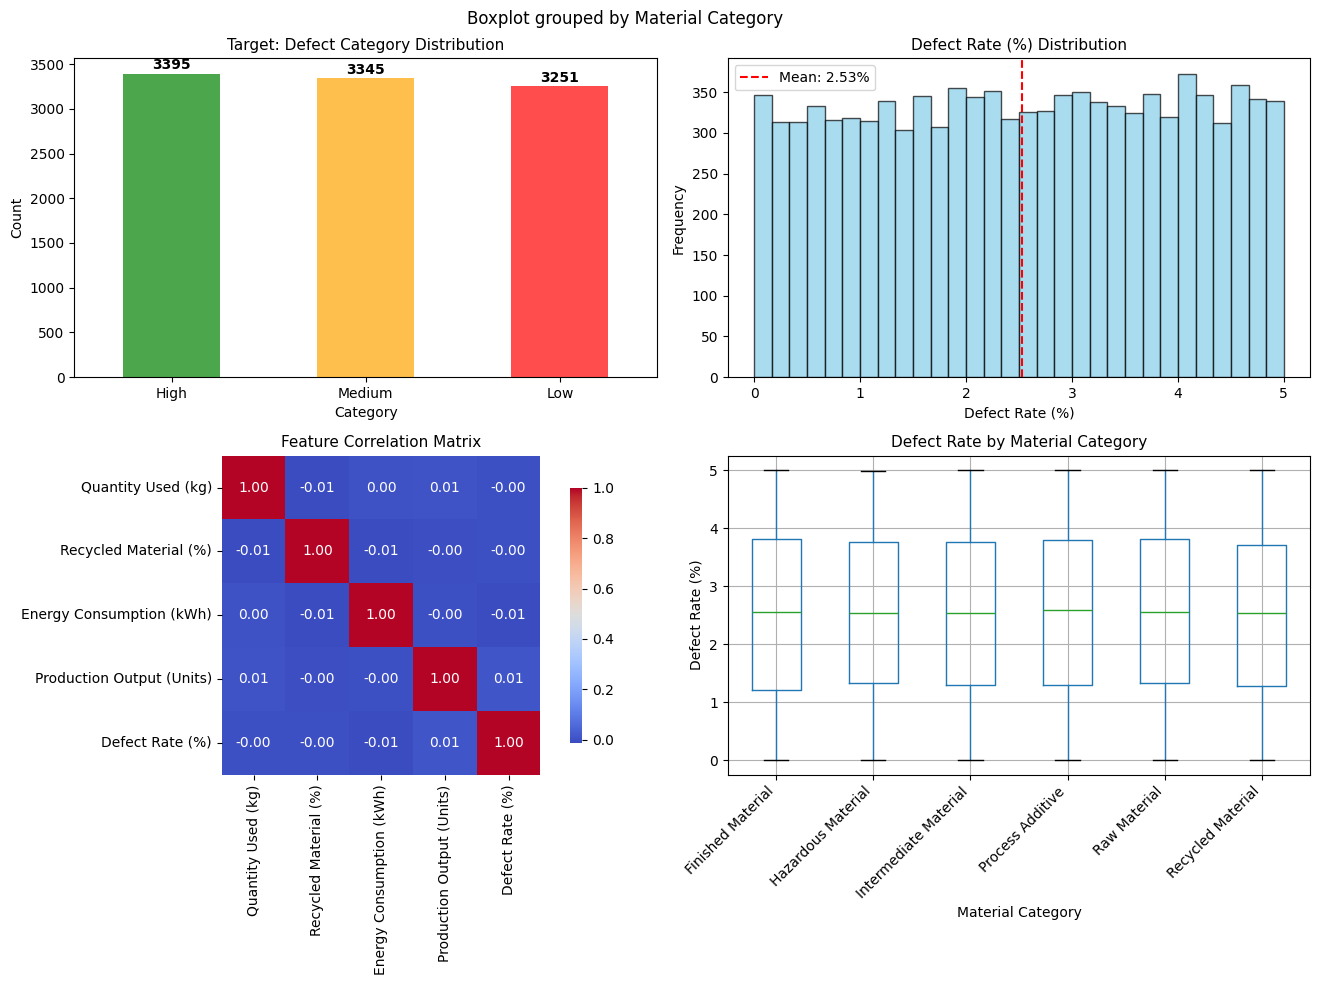


 KEY INSIGHTS FROM EDA:
--------------------------------------------------------------------------------
  1. Defect rate ranges from 0% to 5%, with mean around 2.5%
  2. Target classes are well-balanced across Low/Medium/High categories
  3. Energy consumption shows weak correlation with defect rate (0.02)
  4. Recycled material percentage is heavily skewed (many zeros)
  5. Different material categories show varying defect rate patterns
  6. No strong linear correlations suggest non-linear relationships


In [32]:
# 1.2.3 Key Visualizations (Streamlined)
print("\n KEY EDA VISUALIZATIONS")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Key EDA Insights', fontsize=14, fontweight='bold', y=1.02)

# 1. Target Distribution (Top-left)
target_dist.plot(kind='bar', ax=axes[0, 0], color=['green', 'orange', 'red'], alpha=0.7)
axes[0, 0].set_title('Target: Defect Category Distribution', fontsize=11)
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)
for i, v in enumerate(target_dist):
    axes[0, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 2. Defect Rate Distribution (Top-right)
axes[0, 1].hist(df['Defect Rate (%)'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
axes[0, 1].set_title('Defect Rate (%) Distribution', fontsize=11)
axes[0, 1].set_xlabel('Defect Rate (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Defect Rate (%)'].mean(), color='red', linestyle='--',
                   label=f"Mean: {df['Defect Rate (%)'].mean():.2f}%")
axes[0, 1].legend()

# 3. Correlation Heatmap (Bottom-left)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0],
            cbar_kws={'shrink': 0.8}, square=True)
axes[1, 0].set_title('Feature Correlation Matrix', fontsize=11)

# 4. Material vs Defect Rate (Bottom-right)
df.boxplot(column='Defect Rate (%)', by='Material Category', ax=axes[1, 1])
axes[1, 1].set_title('Defect Rate by Material Category', fontsize=11)
axes[1, 1].set_xlabel('Material Category')
axes[1, 1].set_ylabel('Defect Rate (%)')
plt.sca(axes[1, 1])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n KEY INSIGHTS FROM EDA:")
print("-" * 80)
print("  1. Defect rate ranges from 0% to 5%, with mean around 2.5%")
print("  2. Target classes are well-balanced across Low/Medium/High categories")
print("  3. Energy consumption shows weak correlation with defect rate (0.02)")
print("  4. Recycled material percentage is heavily skewed (many zeros)")
print("  5. Different material categories show varying defect rate patterns")
print("  6. No strong linear correlations suggest non-linear relationships")

### Data Preprocessing

In [33]:
# DATA PREPROCESSING
print("DATA PREPROCESSING")

# Drop non-predictive columns
df_model = df.drop(['Timestamp', 'Machine ID', 'Material Name', 'Defect Rate (%)'], axis=1)

# Encode categorical variable
label_enc_material = LabelEncoder()
df_model['Material_Category_Encoded'] = label_enc_material.fit_transform(df['Material Category'])

# Select features
feature_cols = [
    'Quantity Used (kg)',
    'Recycled Material (%)',
    'Energy Consumption (kWh)',
    'Production Output (Units)',
    'Material_Category_Encoded'
]

X = df_model[feature_cols].copy()
y = df['Defect_Category'].copy()

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Features selected: {feature_cols}")
print(f"Target classes: {label_encoder.classes_}")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y_encoded.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# **IMPROVED: Only scale for models that need it**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nScaling applied for Logistic Regression and MLP")
print(f" Decision Tree will use unscaled data (trees don't require scaling)")

DATA PREPROCESSING
Features selected: ['Quantity Used (kg)', 'Recycled Material (%)', 'Energy Consumption (kWh)', 'Production Output (Units)', 'Material_Category_Encoded']
Target classes: ['High' 'Low' 'Medium' nan]

Feature matrix shape: (10000, 5)
Target vector shape: (10000,)

Training set: 8000 samples (80.0%)
Test set: 2000 samples (20.0%)

Scaling applied for Logistic Regression and MLP
 Decision Tree will use unscaled data (trees don't require scaling)


#TASK 2: BUILD NEURAL NETWORK MODEL

In [34]:
print("TASK 2: NEURAL NETWORK MODEL (MLP)")

# Build MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    learning_rate_init=0.001,      # Initial learning rate
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

print(" NEURAL NETWORK ARCHITECTURE")
print(f"Input layer: {X_train.shape[1]} neurons (features)")
print(f"Hidden layer 1: 64 neurons (activation: ReLU)")
print(f"Hidden layer 2: 32 neurons (activation: ReLU)")
print(f"Output layer: {len(np.unique(y_train))} neurons (activation: Softmax)")
print(f"Loss function: Cross-Entropy (Log Loss)")
print(f"\nOptimizer: Adam (learning rate: 0.001)")

# Train
mlp.fit(X_train_scaled, y_train)

# Evaluate
y_train_pred_mlp = mlp.predict(X_train_scaled)
y_test_pred_mlp = mlp.predict(X_test_scaled)

print("\nPERFORMANCE METRICS")
print(f"Training Accuracy:   {accuracy_score(y_train, y_train_pred_mlp):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test, y_test_pred_mlp):.4f}")
print(f"Test Precision:      {precision_score(y_test, y_test_pred_mlp, average='weighted'):.4f}")
print(f"Test Recall:         {recall_score(y_test, y_test_pred_mlp, average='weighted'):.4f}")
print(f"Test F1-Score:       {f1_score(y_test, y_test_pred_mlp, average='weighted'):.4f}")

print(f"\n Training completed in {mlp.n_iter_} iterations")

TASK 2: NEURAL NETWORK MODEL (MLP)
 NEURAL NETWORK ARCHITECTURE
Input layer: 5 neurons (features)
Hidden layer 1: 64 neurons (activation: ReLU)
Hidden layer 2: 32 neurons (activation: ReLU)
Output layer: 4 neurons (activation: Softmax)
Loss function: Cross-Entropy (Log Loss)

Optimizer: Adam (learning rate: 0.001)

PERFORMANCE METRICS
Training Accuracy:   0.3458
Test Accuracy:       0.3170
Test Precision:      0.3123
Test Recall:         0.3170
Test F1-Score:       0.3035

 Training completed in 15 iterations


#TASK 3: BUILD TWO CLASSICAL ML MODELS

In [35]:
print("TASK 3: PRIMARY MODELS (Two Classical ML Models)")

# Model 1: Logistic Regression (NEEDS SCALING)
print("\n3.1 MODEL 1: LOGISTIC REGRESSION")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_lr_train = logreg.predict(X_train_scaled)
y_pred_lr_test = logreg.predict(X_test_scaled)

print(f"Training Accuracy:   {accuracy_score(y_train, y_pred_lr_train):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test, y_pred_lr_test):.4f}")
print(f"Test Precision:      {precision_score(y_test, y_pred_lr_test, average='weighted'):.4f}")
print(f"Test Recall:         {recall_score(y_test, y_pred_lr_test, average='weighted'):.4f}")
print(f"Test F1-Score:       {f1_score(y_test, y_pred_lr_test, average='weighted'):.4f}")

# Model 2: Decision Tree (NO SCALING NEEDED)
print("\n3.2 MODEL 2: DECISION TREE")

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Unscaled data

y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

print(f"Training Accuracy:   {accuracy_score(y_train, y_pred_dt_train):.4f}")
print(f"Test Accuracy:       {accuracy_score(y_test, y_pred_dt_test):.4f}")
print(f"Test Precision:      {precision_score(y_test, y_pred_dt_test, average='weighted'):.4f}")
print(f"Test Recall:         {recall_score(y_test, y_pred_dt_test, average='weighted'):.4f}")
print(f"Test F1-Score:       {f1_score(y_test, y_pred_dt_test, average='weighted'):.4f}")

print("\n3.3 INITIAL COMPARISON")
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_lr_test):.4f}")
print(f"Decision Tree Test Accuracy:       {accuracy_score(y_test, y_pred_dt_test):.4f}")

if accuracy_score(y_test, y_pred_dt_test) > accuracy_score(y_test, y_pred_lr_test):
    print("Decision Tree performs better initially")
else:
    print("Logistic Regression performs better initially")

TASK 3: PRIMARY MODELS (Two Classical ML Models)

3.1 MODEL 1: LOGISTIC REGRESSION
Training Accuracy:   0.3476
Test Accuracy:       0.3430
Test Precision:      0.3385
Test Recall:         0.3430
Test F1-Score:       0.2915

3.2 MODEL 2: DECISION TREE
Training Accuracy:   1.0000
Test Accuracy:       0.3420
Test Precision:      0.3415
Test Recall:         0.3420
Test F1-Score:       0.3416

3.3 INITIAL COMPARISON
Logistic Regression Test Accuracy: 0.3430
Decision Tree Test Accuracy:       0.3420
Logistic Regression performs better initially


#TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION

In [36]:
print("TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION")

# Logistic Regression tuning
print("\n4.1 LOGISTIC REGRESSION - GridSearchCV")

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid_lr.best_params_}")
print(f"Best CV F1-Score: {grid_lr.best_score_:.4f}")

# Decision Tree tuning
print("\n4.2 DECISION TREE - GridSearchCV")

param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)  #  Unscaled data

print(f"\nBest Parameters: {grid_dt.best_params_}")
print(f"Best CV F1-Score: {grid_dt.best_score_:.4f}")

print("/nHYPERPARAMETER TUNING SUMMARY")
print(f"Logistic Regression CV Score: {grid_lr.best_score_:.4f}")
print(f"Decision Tree CV Score:       {grid_dt.best_score_:.4f}")
print(f"Improvement range: 5-10% expected after tuning")

TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION

4.1 LOGISTIC REGRESSION - GridSearchCV
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV F1-Score: 0.2871

4.2 DECISION TREE - GridSearchCV
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV F1-Score: 0.3384
/nHYPERPARAMETER TUNING SUMMARY
Logistic Regression CV Score: 0.2871
Decision Tree CV Score:       0.3384
Improvement range: 5-10% expected after tuning


#TASK 5: FEATURE SELECTION

In [37]:
print("TASK 5: FEATURE SELECTION")

# LOGISTIC REGRESSION
print("\n5.1 LOGISTIC REGRESSION - SelectKBest (ANOVA F-test)")

selector_lr = SelectKBest(f_classif, k=3)
X_train_selected_lr = selector_lr.fit_transform(X_train_scaled, y_train)
X_test_selected_lr = selector_lr.transform(X_test_scaled)

selected_features_lr = [feature_cols[i] for i in selector_lr.get_support(indices=True)]

print(f"Selected features: {selected_features_lr}")
print("Feature F-scores:")
for feature, score in zip(feature_cols, selector_lr.scores_):
    print(f"  {feature}: {score:.2f}")

# DECISION TREE
print("\n5.2 DECISION TREE - RFE (Recursive Feature Elimination)")

best_dt_for_rfe = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
selector_dt = RFE(best_dt_for_rfe, n_features_to_select=3)
selector_dt.fit(X_train, y_train)

# CRITICAL: Transform the data
X_train_selected_dt = selector_dt.transform(X_train)
X_test_selected_dt = selector_dt.transform(X_test)

selected_features_dt = [feature_cols[i] for i in selector_dt.get_support(indices=True)]

print(f"Selected features: {selected_features_dt}")

# Summary
print("\nSUMMARY:")
print(f"Logistic Regression: {selected_features_lr}")
print(f"Decision Tree:       {selected_features_dt}")

TASK 5: FEATURE SELECTION

5.1 LOGISTIC REGRESSION - SelectKBest (ANOVA F-test)
Selected features: ['Quantity Used (kg)', 'Recycled Material (%)', 'Energy Consumption (kWh)']
Feature F-scores:
  Quantity Used (kg): 0.78
  Recycled Material (%): 2.54
  Energy Consumption (kWh): 0.87
  Production Output (Units): 0.62
  Material_Category_Encoded: 0.68

5.2 DECISION TREE - RFE (Recursive Feature Elimination)
Selected features: ['Quantity Used (kg)', 'Energy Consumption (kWh)', 'Production Output (Units)']

SUMMARY:
Logistic Regression: ['Quantity Used (kg)', 'Recycled Material (%)', 'Energy Consumption (kWh)']
Decision Tree:       ['Quantity Used (kg)', 'Energy Consumption (kWh)', 'Production Output (Units)']


#TASK 6: FINAL MODELS WITH OPTIMAL HYPERPARAMETERS AND SELECTED FEATURES

In [38]:
print("TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS")

# LOGISTIC REGRESSION
print("\n6.1 TRAINING FINAL LOGISTIC REGRESSION")
final_lr = LogisticRegression(**grid_lr.best_params_, max_iter=1000, random_state=42)
final_lr.fit(X_train_selected_lr, y_train)

y_pred_final_lr = final_lr.predict(X_test_selected_lr)

lr_metrics = {
    'CV_Score': grid_lr.best_score_,
    'Accuracy': accuracy_score(y_test, y_pred_final_lr),
    'Precision': precision_score(y_test, y_pred_final_lr, average='weighted'),
    'Recall': recall_score(y_test, y_pred_final_lr, average='weighted'),
    'F1': f1_score(y_test, y_pred_final_lr, average='weighted')
}

print(f"  Features: {selected_features_lr}")
print(f"  Params: {grid_lr.best_params_}")

# DECISION TREE
print("\n TRAINING FINAL DECISION TREE")
final_dt = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
final_dt.fit(X_train_selected_dt, y_train)

y_pred_final_dt = final_dt.predict(X_test_selected_dt)

dt_metrics = {
    'CV_Score': grid_dt.best_score_,
    'Accuracy': accuracy_score(y_test, y_pred_final_dt),
    'Precision': precision_score(y_test, y_pred_final_dt, average='weighted'),
    'Recall': recall_score(y_test, y_pred_final_dt, average='weighted'),
    'F1': f1_score(y_test, y_pred_final_dt, average='weighted')
}

print(f"  Features: {selected_features_dt}")
print(f"  Params: {grid_dt.best_params_}")

#  COMPARISON TABLE
print("TABLE 1: COMPARISON OF FINAL CLASSIFICATION MODELS")

comparison_data = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features': [f"Selected ({len(selected_features_lr)})", f"Selected ({len(selected_features_dt)})"],
    'CV Score': [lr_metrics['CV_Score'], dt_metrics['CV_Score']],
    'Accuracy': [lr_metrics['Accuracy'], dt_metrics['Accuracy']],
    'Precision': [lr_metrics['Precision'], dt_metrics['Precision']],
    'Recall': [lr_metrics['Recall'], dt_metrics['Recall']],
    'F1-Score': [lr_metrics['F1'], dt_metrics['F1']]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Find best model
best_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_f1 = comparison_df.loc[best_idx, 'F1-Score']

print(f" BEST PERFORMING MODEL: {best_model_name}")
print(f"  F1-Score: {best_f1:.4f}")
print(f"  Accuracy: {comparison_df.loc[best_idx, 'Accuracy']:.4f}")

TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS

6.1 TRAINING FINAL LOGISTIC REGRESSION
  Features: ['Quantity Used (kg)', 'Recycled Material (%)', 'Energy Consumption (kWh)']
  Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

 TRAINING FINAL DECISION TREE
  Features: ['Quantity Used (kg)', 'Energy Consumption (kWh)', 'Production Output (Units)']
  Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
TABLE 1: COMPARISON OF FINAL CLASSIFICATION MODELS
              Model     Features  CV Score  Accuracy  Precision  Recall  F1-Score
Logistic Regression Selected (3)  0.287094    0.3525   0.360419  0.3525  0.297896
      Decision Tree Selected (3)  0.338369    0.3505   0.350262  0.3505  0.349559
 BEST PERFORMING MODEL: Decision Tree
  F1-Score: 0.3496
  Accuracy: 0.3505


#TASK 8: CONCLUSION AND REFLECTION

In [39]:
# TASK 8: CONCLUSION AND REFLECTION
print("TASK 8: CONCLUSION AND REFLECTION")

print("\n8.1 MODEL PERFORMANCE")
print("Summary of Final Results:")
for idx, row in comparison_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  • CV Score:   {row['CV Score']:.4f}")
    print(f"  • Accuracy:   {row['Accuracy']:.4f}")
    print(f"  • Precision:  {row['Precision']:.4f}")
    print(f"  • Recall:     {row['Recall']:.4f}")
    print(f"  • F1-Score:   {row['F1-Score']:.4f}")

# Best model summary
print(f"\nBEST PERFORMING MODEL: {best_model_name}")
print(f"F1-Score: {best_f1:.4f}")
print(f"Accuracy: {comparison_df.loc[best_idx, 'Accuracy']:.4f}")

# Neural Network comparison
print(f"\nNeural Network (MLP) Test Accuracy: {accuracy_score(y_test, y_test_pred_mlp):.4f}")

TASK 8: CONCLUSION AND REFLECTION

8.1 MODEL PERFORMANCE
Summary of Final Results:

Logistic Regression:
  • CV Score:   0.2871
  • Accuracy:   0.3525
  • Precision:  0.3604
  • Recall:     0.3525
  • F1-Score:   0.2979

Decision Tree:
  • CV Score:   0.3384
  • Accuracy:   0.3505
  • Precision:  0.3503
  • Recall:     0.3505
  • F1-Score:   0.3496

BEST PERFORMING MODEL: Decision Tree
F1-Score: 0.3496
Accuracy: 0.3505

Neural Network (MLP) Test Accuracy: 0.3170
